<a href="https://colab.research.google.com/github/FathimaThan/Thyroid_Recurrence_Prediction_Classification/blob/main/Thyroid_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv


In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data Collection

In [5]:
df = pd.read_csv('/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Data Exploration

In [7]:
df.shape

(383, 17)

There are 383 rows and 17 columns

In [8]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


Maximum age is 82 and minimum age is 15

In [9]:
df.describe(include='object')

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


Key insights:
* Demographics: The majority of patients are female, with a significant frequency of 312.
* Lifestyle: Most patients are non-smokers, and the majority have never smoked.
* Medical History: A large portion (376 out of 383) have never undergone radiotherapy treatment.
* Thyroid Function: The most common thyroid function status is Euthyroid.
* Physical Examination: Multinodular goiter is the prevailing condition noted during physical examinations.
* Pathology: Papillary is the predominant pathology reported among patients.
* Cancer Characteristics: Uni-focal cancer is commonly observed, and most patients are categorized as low risk.
* Tumor and Metastasis: T2 is the most frequent tumor classification, and M0 indicates the absence of distant metastases.
* Cancer Stage: The majority of patients are diagnosed with stage 1 cancer.
* Treatment Response: Patients generally respond well to treatment, with most reporting an excellent response.
* Recurrence: Fortunately, the majority of patients have not experienced cancer recurrence.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

There is one integer column and sixteen object columns. With a non-null count of 383 for each column, which matches the total number of rows, this indicates that there are no missing values in the dataset.

In [11]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [12]:
df.duplicated().sum()

19

There are 19 duplicate rows

# Data Preprocessing

In [13]:
df[df.duplicated]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
120,37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


These are the duplicate rows. For extra clarity, let's see how many times each duplicate row has been repeated.

In [14]:
# Checking for duplicate rows and counting occurrences
duplicate_counts = df.groupby(df.columns.tolist()).size().reset_index(name='Count')

# Printing the rows that are duplicated
duplicate_counts[duplicate_counts['Count'] > 1]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Count
18,21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
23,22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
48,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,4
76,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
86,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,2
113,31,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
129,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,3
145,34,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No,2
160,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No,2
166,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,2


In [15]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

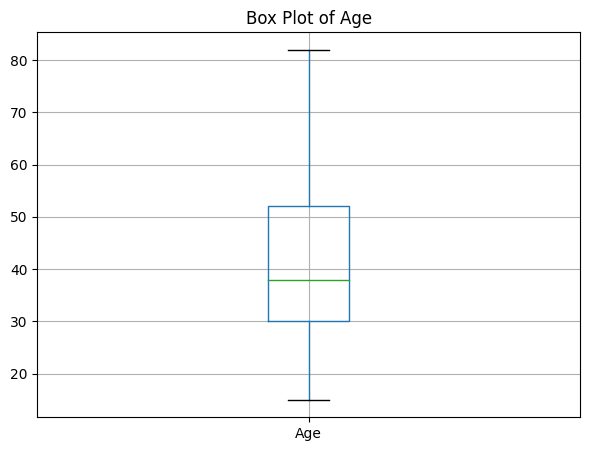

In [16]:
plt.figure(figsize = (7,5))
df.boxplot(column = 'Age')
plt.title('Box Plot of Age')
plt.show()

Key insights:

- The box extends from approximately 30 to 50, indicating the interquartile range (IQR) of the data.
- The line inside the box represents the median age, which is slightly below 40.
- There are no outliers present in the data, as indicated by the absence of points beyond the whiskers.

Let's explore further to check for any outliers.

In [17]:
def find_outlier_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

In [18]:
outliers = find_outlier_iqr(df['Age'])
print(outliers)

[]


There are no oultiers.

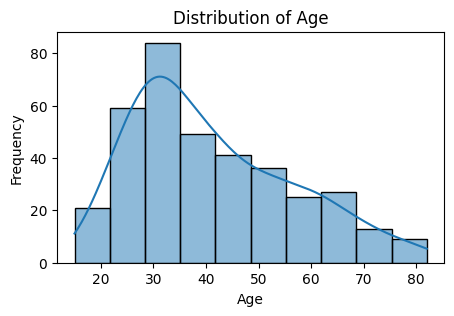

In [19]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='Age', kde=True, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Key insights:

* Unimodal Distribution: The data shows a single, prominent peak, indicating that the age distribution is unimodal.
* Peak at Bin 30: The highest frequency of ages is around bin 30, suggesting that most patients fall within this age range.
* Right Tail: The distribution has a right tail, indicating that there are fewer patients in the older age ranges.
* Range: The plot spans from approximately bin 20 to bin 80, covering the entire range of ages in the dataset.
* No Significant Spikes or Outliers: The distribution is smooth with no significant spikes or outliers, suggesting that the age data is evenly distributed without anomalies.

In [20]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

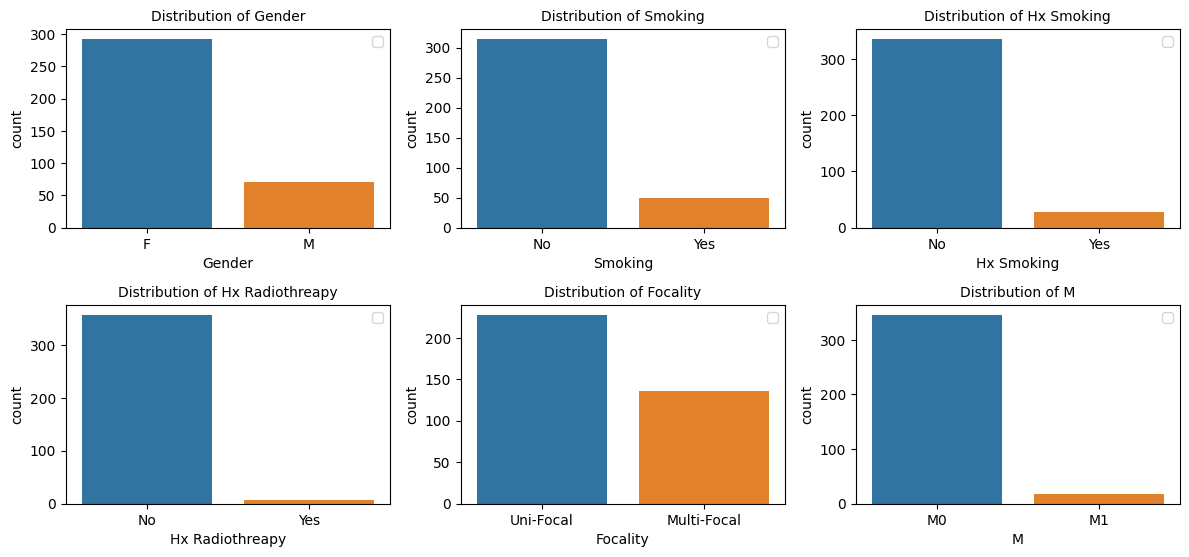

In [21]:
# distribution of categorical variables
plt.figure(figsize = (12,8))
columns_to_plot = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality', 'M']
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x = df[col], hue = df[col])
    plt.title(f'Distribution of {col}', fontsize = 10)
    plt.legend([])

plt.tight_layout()
plt.show()

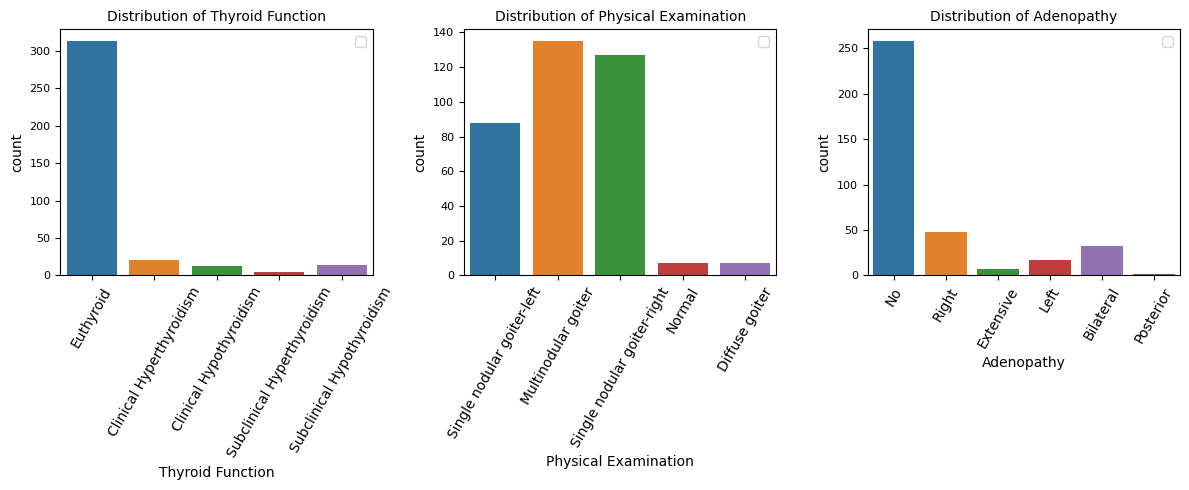

In [22]:
columns_to_plot = ['Thyroid Function', 'Physical Examination', 'Adenopathy']

plt.figure(figsize = (12,5))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x=df[col], hue=df[col], dodge=False)
    plt.title(f'Distribution of {col}', fontsize=10)

    # Reduce font size of bar values
    ax.tick_params(axis='y', labelsize=8)
    plt.legend([])  # Remove the legend
    plt.xticks(rotation = 60)

plt.tight_layout()
plt.show()

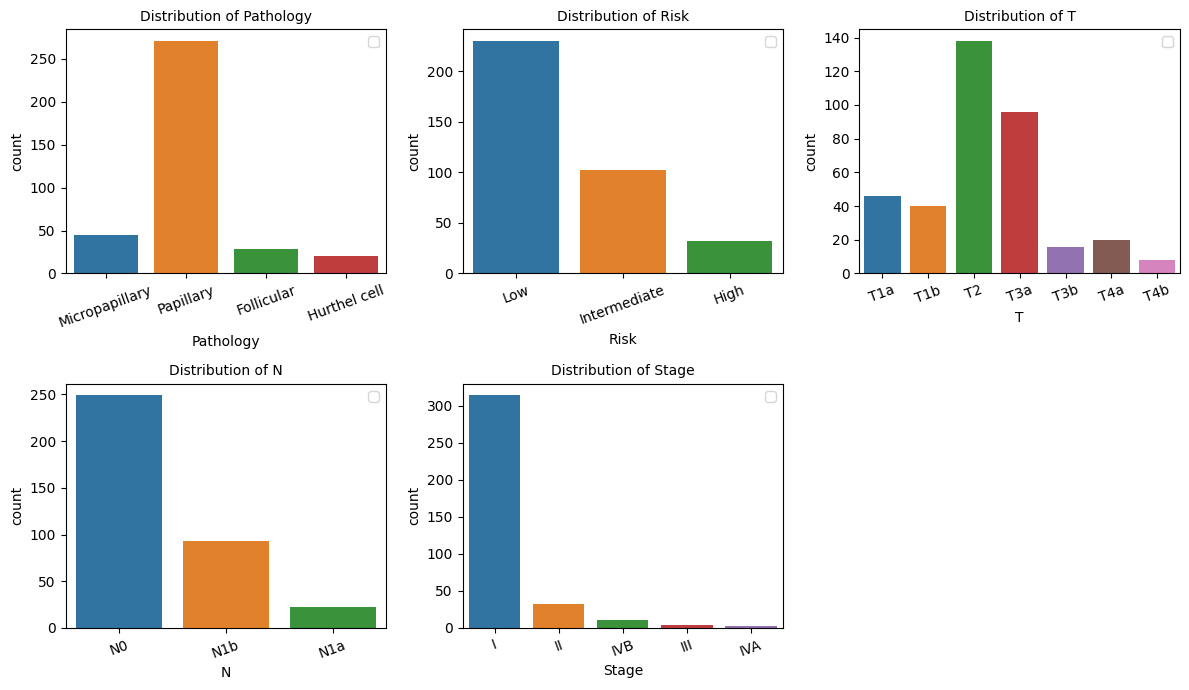

In [23]:
# distribution of categorical variables
plt.figure(figsize = (12,7))
columns_to_plot = ['Pathology', 'Risk', 'T', 'N', 'Stage']
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x = df[col], hue = df[col], dodge=False)
    plt.title(f'Distribution of {col}', fontsize = 10)
    plt.legend([])
    plt.xticks(rotation = 20)

plt.tight_layout()
plt.show()

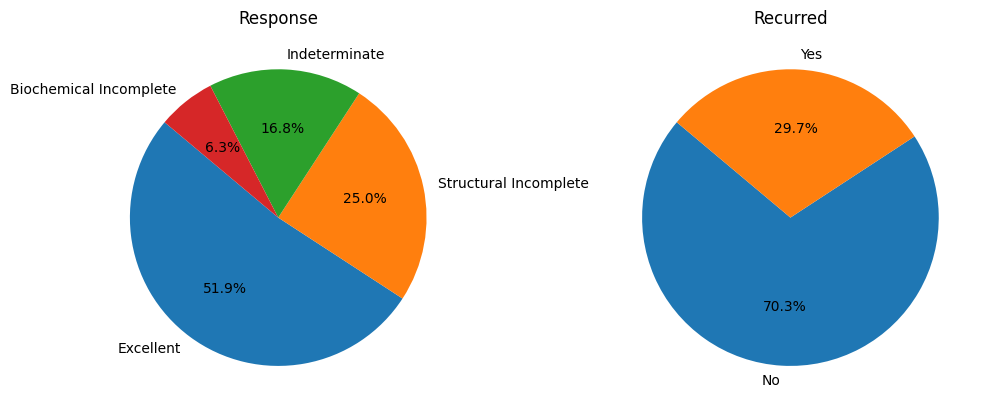

In [24]:
plt.figure(figsize=(10, 5))

# Pie chart for Response
plt.subplot(1, 2, 1)
response_counts = df['Response'].value_counts()
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Response')

# Pie chart for Recurred
plt.subplot(1, 2, 2)
recurred_counts = df['Recurred'].value_counts()
plt.pie(recurred_counts, labels=recurred_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Recurred')

plt.tight_layout()
plt.show()

# Feature Engineering

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
categorical = df.select_dtypes(include = "object")
for column in categorical.columns:
  df[column] = encoder.fit_transform(df[column])

In [26]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


# Model Development

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Recurred')
y = df['Recurred']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [29]:
# Define hyperparameters grid for each model
params = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# Model Training and Evaluation

In [30]:
# Hyperparameter tuning and model selection using GridSearchCV
best_models = {}
best_params = {}
for name, model in models.items():
    clf = GridSearchCV(model, params[name], cv=5)
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_
    best_params[name] = clf.best_params_

# Evaluation and selection
best_accuracy = 0
best_model_name = None
best_model = None
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{name}: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}, Best Hyperparameters = {best_params[name]}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

print(f'Best model: {best_model_name}, Accuracy = {best_accuracy:.2f}, Best Hyperparameters = {best_params[best_model_name]}')

KNN: Accuracy = 0.84, F1 Score = 0.82, Best Hyperparameters = {'n_neighbors': 3}
SVM: Accuracy = 0.90, F1 Score = 0.90, Best Hyperparameters = {'C': 0.1, 'kernel': 'linear'}
Random Forest: Accuracy = 0.96, F1 Score = 0.96, Best Hyperparameters = {'max_depth': None, 'n_estimators': 150}
XGBoost: Accuracy = 0.95, F1 Score = 0.95, Best Hyperparameters = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best model: Random Forest, Accuracy = 0.96, Best Hyperparameters = {'max_depth': None, 'n_estimators': 150}


XGBoost is the best model

In [31]:
# Evaluate the best model with additional metrics
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nBest Model: {best_model_name}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Best Model: Random Forest
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Confusion Matrix:
[[48  1]
 [ 2 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.96      0.92      0.94        24

    accuracy                           0.96        73
   macro avg       0.96      0.95      0.95        73
weighted avg       0.96      0.96      0.96        73



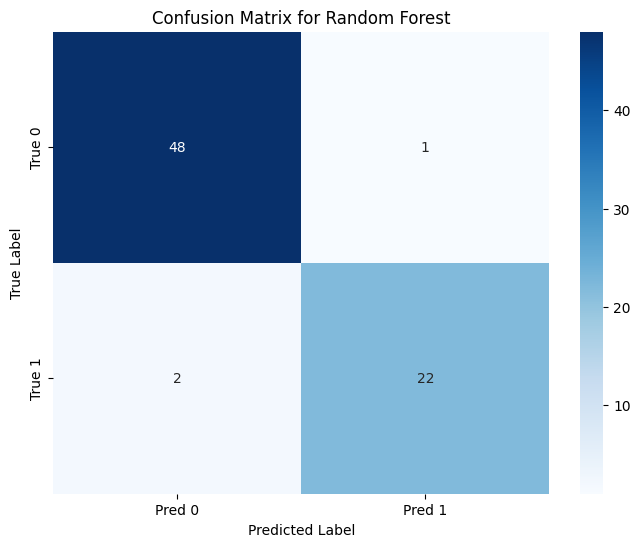

In [32]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()